In [24]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler
%load_ext memory_profiler


lif = "../tests/data/2015Aug28_TransHXB2_50min+DMSO.lif"
img_tile = "../tests/data/t4_1.tif"
img_void_tile = "../tests/data/tile6_1.tif"

img = "../tests/data/exp2_2.tif"
mcts = "../tests/data/multi-channel-time-series.ome.tif"

import imgread.read as ir

import javabridge
import bioformats

javabridge.start_vm(class_path=bioformats.JARS)

import matplotlib.pyplot as plt
import skimage.io
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [25]:
md, wr = ir.read(img_void_tile)

In [26]:
md

{'Bits': 16,
 'Date': '2016-04-06T16:44:44',
 'Format': 'OME-TIFF',
 'Name': None,
 'PhysicalSizeX': 0.2,
 'PhysicalSizeY': 0.2,
 'PhysicalSizeZ': 1000.0,
 'SizeC': 3,
 'SizeS': 14,
 'SizeT': 4,
 'SizeX': 512,
 'SizeY': 512,
 'SizeZ': 1,
 'series': [{'PositionXYZ': {(50.62738, 81.83527, 21.953)}},
  {'PositionXYZ': {(50.62738, 81.73286, 21.953)}},
  {'PositionXYZ': {(50.62738, 81.63046, 21.953)}},
  {'PositionXYZ': {(50.83218, 81.52807, 21.953)}},
  {'PositionXYZ': {(50.83218, 81.42567, 21.953)}},
  {'PositionXYZ': {(50.72978, 81.52807, 21.953)}},
  {'PositionXYZ': {(50.72978, 81.42567, 21.953)}},
  {'PositionXYZ': {(50.62738, 81.52807, 21.953)}},
  {'PositionXYZ': {(50.93458, 81.52807, 21.953)}},
  {'PositionXYZ': {(50.83218, 81.63046, 21.953)}},
  {'PositionXYZ': {(50.72978, 81.63046, 21.953)}},
  {'PositionXYZ': {(50.72978, 81.73286, 21.953)}},
  {'PositionXYZ': {(50.52498, 81.73286, 21.953)}},
  {'PositionXYZ': {(50.52498, 81.63046, 21.953)}}]}

/home/dan/.venvs/imgread/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/dan/.venvs/imgread/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


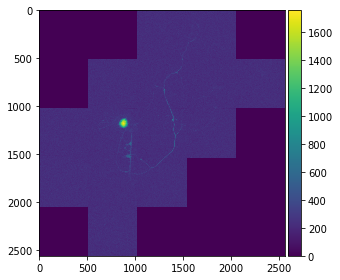

In [28]:
f = ir.stitch(md, wr, c=2, t=2)
skimage.io.imshow(f)

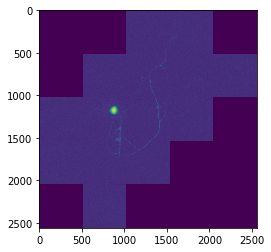

In [30]:
plt.imshow(f)

# performance
## showinf

In [2]:
%timeit ir.read_inf(lif), ir.read_inf(img), ir.read_inf(img_tile)
%memit ir.read_inf(lif), ir.read_inf(img), ir.read_inf(img_tile)

12.5 s ± 134 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 86.48 MiB, increment: 0.03 MiB


## bioformats (std)

In [2]:
%timeit ir.read_bf(lif), ir.read_bf(img), ir.read_bf(img_tile)
%memit ir.read_bf(lif), ir.read_bf(img), ir.read_bf(img_tile)

631 ms ± 143 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 631.20 MiB, increment: 2.51 MiB


## javabridge

In [2]:
# OME-TIFF only
%timeit ir.read_jb(img), ir.read_jb(img_tile)
%memit ir.read_jb(img), ir.read_jb(img_tile)

953 ms ± 74.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 566.37 MiB, increment: 83.94 MiB


## read

In [3]:
%timeit ir.read(lif), ir.read(img), ir.read(img_tile)
%memit ir.read(lif), ir.read(img), ir.read(img_tile)

1.23 s ± 52.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
peak memory: 794.49 MiB, increment: 18.58 MiB


# other performance optimization tools

In [4]:
%prun (ir.read(lif), ir.read(img), ir.read(img_tile))

In [3]:
%lprun -f ir.read ir.read(img_tile)

In [33]:
%mprun -f ir.read ir.read(img_tile)

In [35]:
import cProfile

In [36]:
cProfile.run("ir.read(lif)")

         420880 function calls (420879 primitive calls) in 0.419 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.419    0.419 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 formatreader.py:100(make_iformat_reader_class)
        1    0.000    0.000    0.000    0.000 formatreader.py:107(IFormatReader)
        1    0.000    0.000    0.024    0.024 formatreader.py:200(setId)
        1    0.000    0.000    0.002    0.002 formatreader.py:243(get_class_list)
        1    0.000    0.000    0.000    0.000 formatreader.py:248(ClassList)
        1    0.000    0.000    0.002    0.002 formatreader.py:259(__init__)
        1    0.000    0.000    0.002    0.002 formatreader.py:288(make_image_reader_class)
        1    0.000    0.000    0.000    0.000 formatreader.py:297(ImageReader)
        1    0.000    0.000    0.001    0.001 formatreader.py:299(__init__)
        1    0.000    0.000  